# 网络爬虫简介
----------

主讲人：李显祥

大气科学学院

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

- 网络爬虫是一种按照一定的规则，自动的抓取万维网信息的程序或者脚本。

- 爬取网络信息是一个综合性的任务，需要掌握网络、网页、字符串处理、结构性文件处理等多方面内容。

- Python 有丰富的包来处理网络连接、数据获取、数据提取和分析、数据可视化。

## 爬虫的风险

- 切记：谨守底线，注意法律风险

- 知识产权、商业机密、破坏计算机网络

- <span style='color:red'> 爬虫做得好，牢饭准管饱! </span>

<table width='100%'>
    <tr>
        <td width='30%'><img src='IMG_0115.JPG'/></td>
        <td width='30%'><img src='IMG_0116.JPG'/></td>
        <td width='30%'><img src='IMG_0117.JPG'/></td>
    </tr>
</table>

## 浏览网页的过程

- 用户输入网址，或点击链接

- 浏览器对请求进行处理，向服务器发出请求（request）

- 服务器经过解析之后，发送回应信息（response）给浏览器，包括 HTML、JavaScript、CSS 等文件

- 浏览器对信息进行解析、渲染，展现给用户

因此，用户看到的网页实质是由 HTML/JavaScript 代码构成的，爬虫爬来的便是这些内容，通过分析和过滤这些 HTML/JavaScript 代码，实现对图片、文字等资源的获取。

## URL的含义

- URL (Universal Resources Locator)，即统一资源定位符，也就是我们说的网址

- URL 是对可以从互联网上得到的资源的位置和访问方法的一种简洁的表示，是互联网上标准资源的地址。互联网上的每个文件都有一个唯一的URL，它包含的信息指出文件的位置以及浏览器应该怎么处理它。

- URL的格式由三部分组成：
  1. 第一部分是协议(或称为服务方式)。例如：HTTP = Hypertext Transfer Protocol
  2. 第二部分是存有该资源的主机IP地址(有时也包括端口号)。
  3. 第三部分是主机资源的具体地址，如目录和文件名等。

- 爬虫爬取数据时必须要有一个目标的URL才可以获取数据，因此，它是爬虫获取数据的基本依据。

## 请求 Request

- HTTP 协议中的常用请求方法包括 GET 和 POST。

- 通常 POST 能发送更多数据（通过 request body)，多用在提交表格等场景

- 我们需要根据服务器的要求来决定发送哪一类请求

## `urllib` 包

In [2]:
import urllib

- `urllib` 是一个处理 URL 的库。它包含多个子库：

- `urllib.request` 用来打开和读取 URL 指向的资源

- `urllib.error` 包含由 `urllib.request` 产生的意外 (exception)

- `urllib.parse` 用来处理 URL 地址，比如将一个 URL 地址分拆为几个部分，或对中文字符进行转换

- `urllib.robotparser` 用来分析网站的 `robots.txt` 文件（告诉爬虫本站的爬取规则）

- `urllib.request.urlopen(url, data=None, [timeout,])`: 打开一个网站 `url`，可以是一个URL，
    也可以是一个 `urllib.request.Request` 对象

- `urllib.request.Request(url, data=None, headers={}, ..., method=None)`：
构造一个 `urllib.request.Request` 对象，可以传给 `urllib.request.urlopen` 函数

- `urllib.request.urlretrieve(url, filename=None, ...)`: 直接提取文件 `url`，并存储为 `filename`。

- `urllib.parse.quote(string, safe='/', encoding=None, errors=None)`: 将 `string` 按照 URL 编码规则进行编码，`safe` 是可以不用转换的字符

In [3]:
url = 'http://www.sysu.edu.cn/2012/cn/index.htm'
r = urllib.request.urlopen(url).read().decode()  # 不用 decode() 则中文内容为乱码
print(r)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=7" />
<title>中山大学 SUN YAT-SEN UNIVERSITY </title>

<meta name="Keywords" content="中山大学" />
<meta name="Description" content="中山大学是由孙中山先生亲手创立，有着100多年的办学传统，由原中山大学和中山医科大学合并组建，是包括人文科学、社会科学、自然科学、技术科学、工学、医学、药学、经济学和管理学等在内的综合性重点大学。" />
<link href="../css/layout.css" rel="stylesheet" type="text/css" />
<link href="../css/screen.css" rel="stylesheet" type="text/css" />
<link rel="stylesheet" type="text/css" href="../mainslide/homepage.css">
<link rel="stylesheet" type="text/css" href="../mainslide/jquery.css">
<script src="../mainslide/jquery.js" type="text/javascript"></script>
<script src="../js/scroll.js"></script>
<script src="../mainslide/custom.js" type="text/javascript"></script>
<script src="../mainslid

In [4]:
url = 'http://www.sysu.edu.cn/2012/images/content/2012-11/20121109221446303940.jpg'
urllib.request.urlretrieve(url, 'sysu_logo.jpg')

('sysu_logo.jpg', <http.client.HTTPMessage at 0x119c1a450>)

![](sysu_logo.jpg)

In [6]:
cn_url = 'http://baike.baidu.com/item/人民的名义/17545218'
r = urllib.request.urlopen(cn_url).read().decode()  # 不用 decode() 则中文内容为乱码
print(r)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 10-14: ordinal not in range(128)

所以，我们需要利用 `urllib.parse.quote` 对中文网址进行处理：

In [8]:
import string
new_url = urllib.parse.quote(cn_url,safe = string.printable)
print(cn_url) 
print(new_url)

http://baike.baidu.com/item/人民的名义/17545218
http://baike.baidu.com/item/%E4%BA%BA%E6%B0%91%E7%9A%84%E5%90%8D%E4%B9%89/17545218


In [9]:
r = urllib.request.urlopen(new_url)
print(r.read().decode())  # 不用 decode() 则中文内容为乱码

<!DOCTYPE html>
<!--STATUS OK-->
<html>




<head>
<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="referrer" content="always" />
<meta name="description" content="《人民的名义》是最高人民检察院影视中心、中央军委后勤保障部金盾影视中心出品，由李路执导、周梅森编剧、李学政等担任总监制，陆毅、张丰毅、吴刚、许亚军、张志坚、柯蓝、胡静、张凯丽、赵子琪、白志迪、李建义、王丽云、高亚麟、丁海峰、冯雷、李光复、...">
<title>人民的名义（2017年李路执导电视剧）_百度百科</title>
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu.svg">

<meta name="keywords" content="人民的名义 人民的名义剧情简介 人民的名义分集剧情 人民的名义演职员表 人民的名义角色介绍 人民的名义音乐原声 人民的名义幕后花絮 人民的名义获奖记录 人民的名义幕后制作 人民的名义播出信息 人民的名义剧集评价 人民的名义剧集争议">
<meta name="image" content="https://bkssl.bdimg.com/cms/static/baike.png">
<script type="text/javascript">
  // 配置 PD 监控。
  window.alogObjectConfig = {
    product: '103',
    page: '103_1',
    speed: {
      sample: '0.008'
    },
    monkey: {
      sample: '1',
      hid: '1533'
    },
    exception: { 
      sample: '0.004'
    },


## Requests 包

- `urllib` 包的功能比较基本

- `Requests` 包是一个强大的网络库，它提供几乎所有 HTTP 相关的功能

- `requests.get()`

- `requests.post()`

In [10]:
import requests

In [11]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post("http://httpbin.org/post", data=payload)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": "value1", 
    "key2": "value2"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e73323f-ddc893326343cce77aa78bf6"
  }, 
  "json": null, 
  "origin": "218.19.145.11", 
  "url": "http://httpbin.org/post"
}



In [12]:
req = requests.get(cn_url)
print(req.content.decode())

<!doctype html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>百度百科——全球最大中文百科全书</title>
    <style>
    p {
        margin: 0;
    }
    .baikeLogo {
        width: 780px;
        height: 50px;
        margin: 150px auto 75px;
        text-indent: -9999em;
    background: url(https://gss0.baidu.com/70cFsjip0QIZ8tyhnq/img/baike/logo-baike.png) 50% 50% no-repeat;
    }
    /* S-- errorBox */
        .errorBox {
            width: 780px;
            margin: 0 auto 65px; 
            text-align: center;
            font-family: "Microsoft yahei";
        }
        .errorBox .timeOut {
            color: #666;
            font-size: 16px;
        }
        .errorBox .timeOut a {
            color: #136ec2;
            text-decoration:none;
        }
        .errorBox .countdown {
            font-weight: 700;
        }
    /* E-- errorBox */

    /* S-- sorryBox */
        .sorryBox {
            position: relative;
            margin-bottom: 10px;
        }
        .sorryBox

In [13]:
print('Status: ', req.status_code)
print('Encoding: ', req.encoding)
print('Request headers: ', req.request.headers)

Status:  200
Encoding:  ISO-8859-1
Request headers:  {'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'BAIDUID=1290A8997398839B42C40ACFDD11CFC9:FG=1'}


In [14]:
# requests 不需要我们对中文网址进行编码，但是必须伪装成浏览器，否则百度百科会返回错误
req = requests.get(cn_url,headers={'User-Agent': 'Mozilla/5.0'})
print(req.content.decode())

<!DOCTYPE html>
<!--STATUS OK-->
<html>




<head>
<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="referrer" content="always" />
<meta name="description" content="《人民的名义》是最高人民检察院影视中心、中央军委后勤保障部金盾影视中心出品，由李路执导、周梅森编剧、李学政等担任总监制，陆毅、张丰毅、吴刚、许亚军、张志坚、柯蓝、胡静、张凯丽、赵子琪、白志迪、李建义、王丽云、高亚麟、丁海峰、冯雷、李光复、...">
<title>人民的名义（2017年李路执导电视剧）_百度百科</title>
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu.svg">

<meta name="keywords" content="人民的名义 人民的名义剧情简介 人民的名义分集剧情 人民的名义演职员表 人民的名义角色介绍 人民的名义音乐原声 人民的名义幕后花絮 人民的名义获奖记录 人民的名义幕后制作 人民的名义播出信息 人民的名义剧集评价 人民的名义剧集争议">
<meta name="image" content="https://bkssl.bdimg.com/cms/static/baike.png">
<script type="text/javascript">
  // 配置 PD 监控。
  window.alogObjectConfig = {
    product: '103',
    page: '103_1',
    speed: {
      sample: '0.008'
    },
    monkey: {
      sample: '1',
      hid: '1533'
    },
    exception: { 
      sample: '0.004'
    },


## 利用 Chrome/Firefox 获取 Get/Post 参数

Chrome 和 Firefox 都有 `developer tools` 可以给我们提供网站访问的详细信息，从而给我们爬取网站信息带来很多便利。

### 例：珠海各区气温

http://www.zhmb.org.cn/jeecms/web/qxjc/wdqx

In [15]:
stations = ['xz','jw','dm','hq']
base_url = 'http://www.zhmb.org.cn/jeecms/web/qxjc/wdqx'

url = base_url + '?elementType='+stations[0]+'&type='+stations[0]

req = requests.get(url)

print(req.text)













<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<title>珠海气象</title>
<link href="/jeecms/static/common/css/General.css;jsessionid=B628DCBF614300D622603CAEAEBCBCD1" type="text/css" rel="stylesheet"/>
<link href="/jeecms/static/common/css/secondarys.css;jsessionid=B628DCBF614300D622603CAEAEBCBCD1" type="text/css" rel="stylesheet"/>
<link ID="skin" href="/jeecms/static/common/css/blues.css;jsessionid=B628DCBF614300D622603CAEAEBCBCD1" type="text/css" rel="stylesheet"/>
<script src="/jeecms/static/common/js/jquery-1.11.1.min.js;jsessionid=B628DCBF614300D622603CAEAEBCBCD1" type="text/javascript"></script>
<script type="text/javascript" src="/jeecms/static/common/js/jquery-latest.js;jsessionid=B628DCBF614300D622603CAEAEBCBCD1"></script>
<script type="text/javascript" src="/jeecms/static/common/js/skin_change.js;jsessionid=B628DCBF614300D622603CAEA

### 例：爬取台风路径数据

http://typhoon.weather.com.cn/

In [16]:
import time
import json

year = "2019" # 输入台风的年份
typhoon_id = "1909" # 输入利奇马台风的编号 1909
url = "http://d1.weather.com.cn/typhoon/typhoon_data/"+year+"/"+typhoon_id+".json?callback=getData&_="+str(int(round((time.time()*1000))))
headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36",
        "Referer": "http://typhoon.weather.com.cn/gis/typhoon_p.shtml",
    }
r = requests.get(url,headers=headers)
#a = json.loads(r.text[8:-1])#解析json文件

In [17]:
print(r.text)

getData({"typhoon":[null,"LEKIMA","利奇马","1909","1909",null,null,"stop",[[null,"2019-08-04 14时","1564898400","TD","131.5","16.7","1000","15","北","8",[],{"BABJ":[]},["201908041400","2019年08月04日14时00分","201908041400","2019年08月04日14时00分"]],[null,"2019-08-04 17时","1564909200","TS","131.5","17.1","998","18","北","6",[["30KTS","200","350","420","250",null]],{"BABJ":[]},["201908041700","2019年08月04日17时00分","201908041700","2019年08月04日17时00分"]],[null,"2019-08-04 20时","1564920000","TS","131.3","17.4","998","18","西北","5",[["30KTS","200","350","420","250",null]],{"BABJ":[]},["201908042000","2019年08月04日20时00分","201908042000","2019年08月04日20时00分"]],[null,"2019-08-04 23时","1564930800","TS","130.9","17.7","995","20","西西北","5",[["30KTS","200","350","420","250",null]],{"BABJ":[]},["201908042300","2019年08月04日23时00分","201908042300","2019年08月04日23时00分"]],[null,"2019-08-05 02时","1564941600","TS","130.5","17.9","990","23","西北","4",[["30KTS","200","350","450","300",null]],{"BABJ":[]},["201908050200","2019年08月05日0

In [18]:
a=json.loads(r.text[8:-1])

In [19]:
a.keys()

dict_keys(['typhoon'])

In [20]:
print(a['typhoon'])

[None, 'LEKIMA', '利奇马', '1909', '1909', None, None, 'stop', [[None, '2019-08-04 14时', '1564898400', 'TD', '131.5', '16.7', '1000', '15', '北', '8', [], {'BABJ': []}, ['201908041400', '2019年08月04日14时00分', '201908041400', '2019年08月04日14时00分']], [None, '2019-08-04 17时', '1564909200', 'TS', '131.5', '17.1', '998', '18', '北', '6', [['30KTS', '200', '350', '420', '250', None]], {'BABJ': []}, ['201908041700', '2019年08月04日17时00分', '201908041700', '2019年08月04日17时00分']], [None, '2019-08-04 20时', '1564920000', 'TS', '131.3', '17.4', '998', '18', '西北', '5', [['30KTS', '200', '350', '420', '250', None]], {'BABJ': []}, ['201908042000', '2019年08月04日20时00分', '201908042000', '2019年08月04日20时00分']], [None, '2019-08-04 23时', '1564930800', 'TS', '130.9', '17.7', '995', '20', '西西北', '5', [['30KTS', '200', '350', '420', '250', None]], {'BABJ': []}, ['201908042300', '2019年08月04日23时00分', '201908042300', '2019年08月04日23时00分']], [None, '2019-08-05 02时', '1564941600', 'TS', '130.5', '17.9', '990', '23', '西北', '4', 

In [21]:
a['typhoon'][8][2]

[None,
 '2019-08-04 20时',
 '1564920000',
 'TS',
 '131.3',
 '17.4',
 '998',
 '18',
 '西北',
 '5',
 [['30KTS', '200', '350', '420', '250', None]],
 {'BABJ': []},
 ['201908042000', '2019年08月04日20时00分', '201908042000', '2019年08月04日20时00分']]

In [22]:
#台风轨迹点
start_time = [] #台风到达时间
lon = [] #台风到达地经度
lat = [] #台风到达地纬度
central_pressure = [] #台风中心气压
wind = [] #台风风速风力（米/秒）
direction = [] #未来移向
feature_speed = [] #未来移速
for i in range(len(a["typhoon"][8])):
    start_time.append(a["typhoon"][8][i][1])
    lon.append(a["typhoon"][8][i][4])
    lat.append(a["typhoon"][8][i][5])
    central_pressure.append(a["typhoon"][8][i][6])
    wind.append(a["typhoon"][8][i][7])
    direction.append(a["typhoon"][8][i][8])
    feature_speed.append(a["typhoon"][8][i][9])
typhoon_data = pd.DataFrame({"start_time":start_time,"lon":lon,"lat":lat,"central_pressure":central_pressure,
                            "wind":wind,"direction":direction,"feature_speed":feature_speed})
typhoon_data["start_time"] = pd.to_datetime(typhoon_data["start_time"],format='%Y-%m-%d %H时')
typhoon_data.to_csv('%s.csv'%typhoon_id,index=False)

## BeautifulSoup 包

- BeautifulSoup提供一些简单的、python式的函数用来处理导航、搜索、修改分析树等功能。

- 它是一个工具箱，通过解析文档为用户提供需要抓取的数据

- BeautifulSoup自动将输入文档转换为Unicode编码，输出文档转换为utf-8编码。你不需要考虑编码方式，除非文档没有指定一个编码方式

- BeautifulSoup已成为和lxml、html6lib一样出色的python解释器，为用户灵活地提供不同的解析策略

In [23]:
from bs4 import BeautifulSoup

In [24]:
html = """
<html><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<title>The Dormouse's story</title></head>
<body>
<p class="title" name="dromouse"><b>A fun story about the Dormouse</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1"><!-- Elsie --></a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>
</html>
"""

In [25]:
soup = BeautifulSoup(html)

In [26]:
print(soup.prettify())

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title" name="dromouse">
   <b>
    A fun story about the Dormouse
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    <!-- Elsie -->
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


### BeautifulSoup 中的对象

`BeautifulSoup` 将 `html` 文档分解成四种对象：

- `Tag` 

- `NavigableString`

- `BeautifulSoup` 对象

- `Comment`

`Tag` 对象包括 `html` 中的标签

- `<html><head><title></title></head> <body> </body></html>`

- `<a href=''> </a>`

- `<table> <tr> <td></td> </tr> </table>`

- `<img src='' />`

In [27]:
print(soup.title)

<title>The Dormouse's story</title>


In [28]:
print(soup.head)

<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>The Dormouse's story</title></head>


In [29]:
print(soup.p)

<p class="title" name="dromouse"><b>A fun story about the Dormouse</b></p>


`Tag` 对象的属性

- `name`: 名字，一般为 `Tag` 本身

- `attrs`: 其它属性，以字典形式返回 `Tag` 的属性

In [30]:
print(soup.a.name)
print(soup.a.attrs)

a
{'href': 'http://example.com/elsie', 'class': ['sister'], 'id': 'link1'}


In [31]:
print(soup.p)
print(soup.p.name)
print(soup.p.attrs)

<p class="title" name="dromouse"><b>A fun story about the Dormouse</b></p>
p
{'class': ['title'], 'name': 'dromouse'}


In [32]:
print(soup.p['class'],soup.a['href'])

['title'] http://example.com/elsie


In [33]:
print(soup.p.get('class'),soup.a.get('id'))

['title'] link1


`NavigableString` 可以用来得到 `Tag` 内部的文字内容: `tag.string`, 也可以直接用 `tag.text` 得到 `str` 类型

In [34]:
print(soup.p.string)
print(soup.title.string)
print(type(soup.p.string),type(soup.p.text))

A fun story about the Dormouse
The Dormouse's story
<class 'bs4.element.NavigableString'> <class 'str'>


`BeautifulSoup` 对象就是整个 `html` 文档，它是遍历整个结构树的根节点。

In [35]:
print(soup.name)
print(soup.attrs)

[document]
{}


`Comment` 对象是一个特殊类型的 NavigableString 对象，
其输出的内容不包括注释符号，所以容易和非注释内容混淆，可能会对我们的文本处理造成意想不到的麻烦。

In [36]:
print(soup.a)
print(soup.a.string)
print(type(soup.a.string))

<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>
 Elsie 
<class 'bs4.element.Comment'>


### 遍历和查找文档树

- 直接子节点 `.contents`(返回列表) `.children`（返回列表迭代器）

- 所有子孙节点 `.descendants`（返回列表迭代器）

- 节点内容 `.string` （返回 `bs4.element.NavigableString` 对象）
 
- 多个内容 `.strings` `.stripped_strings` （返回列表迭代器）

- 父节点 `.parent`，全部祖先节点 `.parents`

- 兄弟节点 `.next_sibling` `.previous_sibling`, 全部兄弟节点 `.next_siblings` `.previous_siblings`

- 前后节点 `.next_element` `.previous_element` （只看顺序，不看辈分）

- 所有前后节点 `.next_elements` `.previous_elements`

- `find_all(name , attrs , recursive , text , **kwargs)`
  - `name` 参数可以查找所有指定名字的 `tag`
  - `keyword` 参数可以查找所有具有某属性和指定名字的 `tag`
  - `text` 参数可以搜搜文档中的字符串内容
- `find(name , attrs , recursive , text , **kwargs )`：只搜索一个匹配值

类似的有 `find_parents` `find_parent` `ind_next_siblings` `find_next_sibling` `find_previous_siblings` `find_previous_sibling` `find_all_next` `find_next` `find_all_previous` `find_previous`

In [37]:
soup.find_all('b')

[<b>A fun story about the Dormouse</b>]

In [38]:
print(soup.find_all('a'))

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [39]:
soup.find_all(["a", "b"])

[<b>A fun story about the Dormouse</b>,
 <a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [40]:
import re
for tag in soup.find_all(re.compile("^b")):  
    print(tag.name)

body
b


In [41]:
soup.find_all(id='link2')

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

In [42]:
soup.find_all(href=re.compile("elsie"))

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>]

In [43]:
soup.find_all("a", class_="sister") # 'class' 是 python 关键词，所以加个下划线

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [44]:
# 或者用 'attrs'
soup.find_all("a", attrs={"class":"sister"})

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [45]:
soup.find_all("a",id='link2',class_="sister") # 多个属性

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

### 例：珠海统计数据

http://tjj.zhuhai.gov.cn/tjsj/jdsj/

In [46]:
headers={'User-Agent': 'Mozilla/5.0'}
js = requests.get('http://tjj.zhuhai.gov.cn/postmeta/i/7570.json',headers=headers) 

js_data = json.loads(js.text)
for c in js_data.get('articles'): 
    t = c['title'] 
    if '供电' in t: 
        print(t+': '+c['url']) 

2020年01月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2479403.html
2019年12月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2461406.html
2019年11月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2421660.html
2019年10月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2398880.html
2019年09月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2350850.html
2019年08月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089271.html
2019年07月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089219.html
2019年06月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089178.html
2019年05月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089145.html
2019年04月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089126.html
2019年03月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089130.html
2019年02月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089134.html
2019年01月度供电、供水: http://tjj.zhuhai.gov.cn/tjsj/jdsj/content/post_2089138.html

In [47]:
js = requests.get('http://tjj.zhuhai.gov.cn/postmeta/i/7570.json',headers=headers) 

js_data = json.loads(js.text)
for c in js_data.get('articles'): 
    t = c['title'] 
    if '供电' in t: 
       url = c['url']
       break

r = requests.get(url,headers=headers) 

In [48]:
soup = BeautifulSoup(r.text)
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="webkit" name="renderer"/>
  <meta content="珠海市统计局网站" name="SiteName"/>
  <meta content="tjj.zhuhai.gov.cn" name="SiteDomain"/>
  <meta content="4404000010" name="SiteIDCode"/>
  <meta content="进度数据" name="ColumnName"/>
  <meta content="进度数据" name="ColumnDescription"/>
  <meta content="进度数据" name="ColumnKeywords"/>
  <meta content="进度数据" name="ColumnType"/>
  <meta content="2020年01月度供电、供水" name="ArticleTitle"/>
  <meta content="2020-02-26 20:08" name="PubDate"/>
  <meta content="珠海市统计局" name="ContentSource"/>
  <meta content="" name="Keywords"/>
  <meta content="" name="description"/>
  <script>
   window.NFCMS_SITE_ID=756027;window.NFCMS_PUB_TYPE="post";window.NFCMS_POST_ID="2479403";window.NFCMS_CAT_ID="7570";
  </script>
  <script src="//statistics.gd.gov.cn/scripts/s.js?t=1584449601">
  </script>
  <t

In [49]:
tables = soup.find_all('table')

In [50]:
len(tables)

3

In [51]:
tables[0]

<table cellpadding="0" style="empty-cells: show; border-collapse:collapse; margin: 0 auto;  overflow: hidden; table-layout:fixed;">
<colgroup><col/>
</colgroup><tbody><tr class="firstRow">
<td><br/></td>
</tr>
<tr>
<td valign="top"><div style=""><div style="margin: 30px auto 0;"><table onclick="change(0)" style="margin: auto;border-collapse: collapse;"><tbody><tr class="firstRow"></tr></tbody></table></div></div></td></tr><tr style="height:27.0px;"><td colspan="3" rowspan="1" style="width:220.0px;padding:0;font:15pt Calibri;text-align:center;vertical-align:middle;border-bottom-color:null;border-bottom:0px;border-left-color:null;border-left:0px;border-right-color:null;border-right:0px;border-top-color:null;border-top:0px;diagonalDown:null;diagonalUp:null;white-space:pre-wrap;">供电、供水</td></tr><tr style="height:21.0px;"><td colspan="" rowspan="" style="width:220.0px;padding:0;font:normal normal 12pt 宋体;text-align:center;vertical-align:middle;border-bottom-color:null;border-bottom:1px soli

In [52]:
for el in tables[0].children:
    print(el,'\n')


 

<colgroup><col/>
</colgroup> 

<tbody><tr class="firstRow">
<td><br/></td>
</tr>
<tr>
<td valign="top"><div style=""><div style="margin: 30px auto 0;"><table onclick="change(0)" style="margin: auto;border-collapse: collapse;"><tbody><tr class="firstRow"></tr></tbody></table></div></div></td></tr><tr style="height:27.0px;"><td colspan="3" rowspan="1" style="width:220.0px;padding:0;font:15pt Calibri;text-align:center;vertical-align:middle;border-bottom-color:null;border-bottom:0px;border-left-color:null;border-left:0px;border-right-color:null;border-right:0px;border-top-color:null;border-top:0px;diagonalDown:null;diagonalUp:null;white-space:pre-wrap;">供电、供水</td></tr><tr style="height:21.0px;"><td colspan="" rowspan="" style="width:220.0px;padding:0;font:normal normal 12pt 宋体;text-align:center;vertical-align:middle;border-bottom-color:null;border-bottom:1px solid;border-left-color:null;border-left:0px;border-right-color:null;border-right:1px solid;border-top-color:null;border-top:1px 

In [53]:
tbody = tables[0].find('tbody')
for c in tbody.children:
    print(c,'\n')

<tr class="firstRow">
<td><br/></td>
</tr> 


 

<tr>
<td valign="top"><div style=""><div style="margin: 30px auto 0;"><table onclick="change(0)" style="margin: auto;border-collapse: collapse;"><tbody><tr class="firstRow"></tr></tbody></table></div></div></td></tr> 

<tr style="height:27.0px;"><td colspan="3" rowspan="1" style="width:220.0px;padding:0;font:15pt Calibri;text-align:center;vertical-align:middle;border-bottom-color:null;border-bottom:0px;border-left-color:null;border-left:0px;border-right-color:null;border-right:0px;border-top-color:null;border-top:0px;diagonalDown:null;diagonalUp:null;white-space:pre-wrap;">供电、供水</td></tr> 

<tr style="height:21.0px;"><td colspan="" rowspan="" style="width:220.0px;padding:0;font:normal normal 12pt 宋体;text-align:center;vertical-align:middle;border-bottom-color:null;border-bottom:1px solid;border-left-color:null;border-left:0px;border-right-color:null;border-right:1px solid;border-top-color:null;border-top:1px solid;diagonalDown:null;diagon

In [54]:
for tr in tbody.find_all('tr'):  
    #for td in tr.find_all('td'):  
    #    print(td.string,'\t')  
    print([td.text.strip() for td in tr.find_all('td')])

['']
['']
[]
['供电、供水']
['指标名称', '1-1月', '同比增长(%)']
['全社会用电量(亿千瓦小时)', '--', '--']
['其中：工业', '--', '--']
['居民', '--', '--']
['总售水量(万立方米)', '3116', '15.7']
['其中：工业', '915', '17.0']
['居民', '1114', '9.3']
['']


### 例：ASEAN 火点信息

http://asmc.asean.org/asmc-haze-hotspot-daily-new#Hotspot

In [55]:
url = 'http://asmc.asean.org/wp-content/themes/asmctheme/page-functions/functions-ajax-haze-daily-hotspot-count-new.php'

df_cols = ['date','Myanmar','Lao_PDR','Philippines','Kalimantan','Sumatra']
df_counts_day = pd.DataFrame(columns=df_cols) 

In [56]:
from datetime import datetime

def read_json(response):
    df = pd.DataFrame(columns=df_cols)
    counts = json.loads(response)
    for line in counts:
       #print(line)
       date = line['date']
       region0 = line[df_cols[1]]
       region1 = line[df_cols[2]]
       region2 = line[df_cols[3]]
       region3 = line[df_cols[4]]
       region4 = line[df_cols[5]]

       data_df = pd.Series([date,region0,region1,region2,region3,region4],index=df_cols)
       df = df.append(data_df,ignore_index=True)
    return df

headers = {'User-Agent': 'Mozilla/5.0'}
payload = {'date':datetime.strftime(datetime(2019,3,9),'%-d %b,%Y'),'pastDays':7,'regions[0]':df_cols[1],'regions[1]':df_cols[2],'regions[2]':df_cols[3],'regions[3]':df_cols[4],'regions[4]':df_cols[5],'daynight':'day','conf':'High'}
r = requests.post(url,headers=headers,data=payload)
if r.status_code!=200:
    print('no data')
else:
    df = read_json(r.content)
    df_counts_day = pd.concat([df_counts_day,df],ignore_index=True)

In [57]:
df_counts_day

,date,Myanmar,Lao_PDR,Philippines,Kalimantan,Sumatra
0,2019-03-02,296,566,42,7,8
1,2019-03-03,143,426,48,6,2
2,2019-03-04,234,236,30,10,2
3,2019-03-05,296,305,59,18,5
4,2019-03-06,260,427,155,5,26
5,2019-03-07,95,833,56,0,14
6,2019-03-08,12,459,31,2,9


In [58]:
df_counts_day = df_counts_day.set_index('date')
df_counts_day
#df_counts_day.to_csv('hotspots.csv')

,Myanmar,Lao_PDR,Philippines,Kalimantan,Sumatra
date,,,,,
2019-03-02,296,566,42,7,8
2019-03-03,143,426,48,6,2
2019-03-04,234,236,30,10,2
2019-03-05,296,305,59,18,5
2019-03-06,260,427,155,5,26
2019-03-07,95,833,56,0,14
2019-03-08,12,459,31,2,9


## 利用 API (Application Programming Interface)

前面用过的天地图和 NASA 的各种数据也是一种 API。

### 例：USGS 世界地震实时信息

USGS 有一个世界地震实时信息的 API，数据以 `GeoJSON` 格式提供（在 `JSON` 基础上，又提供一个 `geometry` 数据）。 

API 文档
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

GeoPandas 可以直接读取网络上的 `GeoJSON` 数据，只需要将 `URL` 传给 `gpd.read_file()`:

In [59]:
import geopandas as gpd

# download data on magnitude 2.5+ quakes from the past week
endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
df = gpd.read_file(endpoint_url)

In [60]:
df

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,ok2020fnel,3.48,"10km WSW of Blanchard, Oklahoma",1584607323692,1584607835133,-360,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,3.0,3.4,...,",ok,",",dyfi,geoserve,origin,phase-data,",99.0,0.090609,0.786603,24.75415,ml,earthquake,"M 3.5 - 10km WSW of Blanchard, Oklahoma",POINT Z (-97.76350 35.10663 0.86578)
1,pr2020079005,3.29,"4km S of Tallaboa, Puerto Rico",1584603635310,1584606886414,-240,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,3.4,...,",pr,",",dyfi,geoserve,origin,phase-data,",8.0,0.136700,0.140000,233.00000,md,earthquake,"M 3.3 - 4km S of Tallaboa, Puerto Rico",POINT Z (-66.70760 17.95110 9.00000)
2,us70008c0m,4.20,"19km SE of Saray, Turkey",1584602037743,1584603194040,210,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",geoserve,origin,phase-data,",NaN,1.001000,0.920000,94.00000,mb,earthquake,"M 4.2 - 19km SE of Saray, Turkey",POINT Z (44.31010 38.50440 10.00000)
3,us70008c0p,4.60,"1km SSW of San Marcelino, Philippines",1584600588679,1584606294916,480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,6.0,3.4,...,",us,",",dyfi,geoserve,origin,phase-data,",NaN,7.861000,0.640000,39.00000,mb,earthquake,"M 4.6 - 1km SSW of San Marcelino, Philippines",POINT Z (120.15500 14.96340 66.53000)
4,pr2020079004,2.76,"3km S of Tallaboa, Puerto Rico",1584599813620,1584606547518,-240,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",pr,",",geoserve,origin,phase-data,",8.0,0.139300,0.160000,222.00000,md,earthquake,"M 2.8 - 3km S of Tallaboa, Puerto Rico",POINT Z (-66.71980 17.96210 7.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,us60008e9x,5.30,"111km SE of Neiafu, Tonga",1584017430336,1584032851040,-720,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",geoserve,moment-tensor,origin,phase-data,",NaN,3.088000,1.500000,44.00000,mb,earthquake,"M 5.3 - 111km SE of Neiafu, Tonga",POINT Z (-173.18590 -19.31320 10.00000)
375,ak0203b9hrk1,2.50,"54km SW of Redoubt Volcano, Alaska",1584013322518,1584013706124,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ak,",",geoserve,origin,",NaN,NaN,0.500000,NaN,ml,earthquake,"M 2.5 - 54km SW of Redoubt Volcano, Alaska",POINT Z (-153.39770 60.11930 155.20000)
376,us60008e8e,4.60,"9km W of Alftanes, Iceland",1584008761473,1584529750687,0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,6.0,3.8,...,",us,",",dyfi,geoserve,origin,phase-data,",NaN,0.750000,1.040000,100.00000,mb,earthquake,"M 4.6 - 9km W of Alftanes, Iceland",POINT Z (-22.21550 64.10650 10.00000)
377,pr2020072009,3.40,"33km NE of Road Town, British Virgin Islands",1584006822140,1584020306485,-240,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,2.0,...,",pr,",",dyfi,geoserve,origin,phase-data,",5.0,1.525600,0.310000,349.00000,md,earthquake,"M 3.4 - 33km NE of Road Town, British Virgin I...",POINT Z (-64.41000 18.64930 40.00000)


利用 `geometry` 信息，我们可以将地震信息绘制到世界地图上。

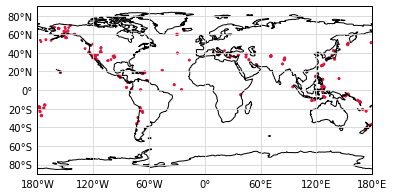

In [61]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

crs = ccrs.PlateCarree()
df_cartopy = df.to_crs(crs.proj4_init)

fig, ax = plt.subplots(subplot_kw={'projection': crs}) 
df_cartopy.plot(ax=ax,color="crimson",markersize=df['mag']) 
gl = ax.gridlines(color='lightgrey', linestyle='-',draw_labels=True) 
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = gl.ylabels_right = False
ax.set_global() 
ax.coastlines()

### 例：ECMWF 气候/气象数据

API 说明 https://cds.climate.copernicus.eu/api-how-to

ERA5 https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form

- 安装 `cdsapi`: `pip install cdsapi`

- 申请一个 API Key，把含有登陆信息的文件放在指定位置

In [62]:
import cdsapi

year = 2018

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type':'reanalysis',
        'format':'grib',
        'variable':[
            '2m_dewpoint_temperature',
            '2m_temperature' #,
            #'maximum_2m_temperature_since_previous_post_processing' #,
            #'mean_sea_level_pressure',
            #'sea_surface_temperature',
            #'surface_pressure',
            #'total_precipitation'
        ],
        'area':'55/70/15/140',
        'year':str(year),
        'month':[
            '01' #,'02','03','04','05','06',
            #'07','08','09','10','11','12'
        ],
        'day':[
            '01' #,'02','03','04','05','06',
            #'07','08','09','10','11','12',
            #'13','14','15','16','17','18',
            #'19','20','21','22','23','24',
            #'25','26','27','28','29','30',
            #'31'
        ],
        'time':[
            '00:00' #,'01:00','02:00','03:00','04:00','05:00',
            #'06:00','07:00','08:00','09:00','10:00','11:00',
            #'12:00','13:00','14:00','15:00','16:00','17:00',
            #'18:00','19:00','20:00','21:00','22:00','23:00'
        ]
    },
    'era5_China_{year}_surface_mx2t.grib'.format(year=str(year)))

ModuleNotFoundError: No module named 'cdsapi'

### 例：新加坡天气、空气质量

https://data.gov.sg/dataset/realtime-weather-readings

In [63]:
import time

def get_response_data(url,n_attempts=10):
    data = None
    try:
        response = requests.get(url) #,headers=hdr)
        if response.status_code == 200:
            if len(response.json()['items'][0]['readings']) >= 1:
                data = response.content
            else:
                data = None
        else:
            if n_attempts > 1:
                print('   status_code = {}, (n_attempts-1) = {}. '
                   'Retrying in 10s.'.format( response.status_code, (n_attempts-1)))
                time.sleep(10)
                data = get_response_data(url, n_attempts=(n_attempts-1))
            else:
                print('   status_code = {}, (n_attempts-1) = {}. '
                  'FAILED TO RETRIEVE DATA.'.format(response.status_code, (n_attempts-1)))
                data = None
                response.close()
    except Exception:
        #print(Exception)
        if n_attempts > 1:
            print('   (n_attempts-1) = {}. '
                  'Retrying in 10s.'.format((n_attempts-1)))
            time.sleep(10)
            data = get_response_data(url, n_attempts=(n_attempts-1))
        else:
            print('   (n_attempts-1) = {}. '
                  'FAILED TO RETRIEVE DATA.'.format( (n_attempts-1)))
            data = None
            #response.close()
    
    return data 

In [64]:
day_time = '2020-03-09T00:00:00'
base_url =  "https://api.data.gov.sg/v1/environment/"
response=get_response_data(base_url+"air-temperature?date_time=" + day_time)
print(response)

b'{"metadata":{"stations":[{"id":"S117","device_id":"S117","name":"Banyan Road","location":{"latitude":1.256,"longitude":103.679}},{"id":"S50","device_id":"S50","name":"Clementi Road","location":{"latitude":1.3337,"longitude":103.7768}},{"id":"S107","device_id":"S107","name":"East Coast Parkway","location":{"latitude":1.3135,"longitude":103.9625}},{"id":"S43","device_id":"S43","name":"Kim Chuan Road","location":{"latitude":1.3399,"longitude":103.8878}},{"id":"S108","device_id":"S108","name":"Marina Gardens Drive","location":{"latitude":1.2799,"longitude":103.8703}},{"id":"S44","device_id":"S44","name":"Nanyang Avenue","location":{"latitude":1.34583,"longitude":103.68166}},{"id":"S121","device_id":"S121","name":"Old Choa Chu Kang Road","location":{"latitude":1.37288,"longitude":103.72244}},{"id":"S106","device_id":"S106","name":"Pulau Ubin","location":{"latitude":1.4168,"longitude":103.9673}},{"id":"S111","device_id":"S111","name":"Scotts Road","location":{"latitude":1.31055,"longitude"

除了气温之外，还有如下几个变量可以获取：

- `wind-speed`
 
- `wind-direction`

- `relative-humidity`

- `rainfall`：5 分钟累积降雨量

- `pm25`: 每小时 PM 2.5 浓度

## References

1.https://cuiqingcai.com/947.html

2.https://cuiqingcai.com/1319.html